Przygotowanie do zajęć:

Dane (były już używane)
adult, pima, https://raw.githubusercontent.com/dennybritz/rnn-tutorial-rnnlm/master/data/reddit-comments-2015-08.csv
"Dane/data_poleval
Dane/international-airline-passengers.csv"


Zainstalować libhdf5-dev, h5py oraz theano:

sudo apt-get install libhdf5-dev 

sudo pip3 install h5py

sudo pip3 install theano

Wywołać w jupyterze (żeby dane ściągnęły się na dysk):

from sklearn.datasets import fetch_lfw_people

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

from keras.datasets import imdb

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=5000)

# Plan dnia

1. Wielowarstwowa sieć neuronowa
2. Sieci konwolucyjne
 - zastosowanie do analizy obrazu w sklali szarości (2D)
 - zastosowanie do analizy obrazu w RGB (3D)

# Metoda spadku gradientu (gradient descent)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time

def f(x):
    return(x**2 - 6*x + 12)
    
def grad_f(x):
    return(2*x - 6)


from IPython import display


def visualise_gradient_decsent(f=f,grad_f=grad_f,theta = -2, learning_rate=0.8, sec=3, x = np.linspace(-5,11,100)):

    """
    Funkcja wizualizujaca optymalizacje metoda spadku gradient.
    
    f - definicja funkcji, ktora chcemy zoptymalizowac
    grad_f - definicja jej pochodnej
    theta - punkt startowy
    learning_rate - wspolczynnik uczenia
    sec - dlugosc przerwy pomiedzy wyswietlaniem kolejnych elementow w sekundach
    x - przedzial na ktorym wizualizujemy dzialanie metody
    
    """
    
    y = f(x)
    
    for i in range(100):

        plt.figure(figsize=(10,10))
        plt.plot(x,y,c="blue")
        plt.scatter(theta,0,s=60)

        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(sec)

        plt.vlines(x=theta,ymin=0,ymax=f(theta))


        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(sec)

        theta_new = theta - learning_rate*grad_f(theta)


        plt.arrow(theta, f(theta), 2, 2*grad_f(theta), head_width = 0.3,head_length = 0.3 )

        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(sec)


        plt.text(-1,40,"grad = %.3f" % grad_f(theta), fontsize=20)

        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(sec)

        plt.text(-2,30,"step = -1 *  %.2f * %.2f = " % (learning_rate,grad_f(theta)), fontsize=20)

        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(sec)

        plt.text(-2,30,"step = -1 *  %.2f * %.2f = %.2f" % (learning_rate,grad_f(theta), -learning_rate*grad_f(theta)), fontsize=20)

        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(sec)



        delta = theta_new - theta

        plt.text(min(theta,theta_new),3,"step = %.3f" % ( -learning_rate*grad_f(theta)), fontsize=20)
        plt.arrow(theta, 0, 0.9*delta, 0, head_width = 1,head_length = np.abs(0.1*delta),color="red" )

        display.display(plt.gcf())

        #plt.annotate('', xy=(theta, 10), xytext=(theta_new, 10),
        #                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
        #                   va='center', ha='center')
        theta = theta_new

        plt.vlines(x=theta,ymin=0,ymax=f(theta))
        #plt.show()

        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(sec)

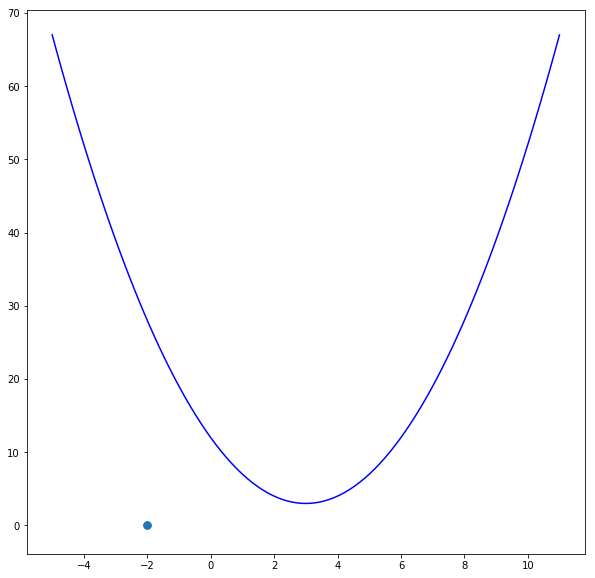

KeyboardInterrupt: 

In [4]:
visualise_gradient_decsent(learning_rate=0.3)

In [ ]:
visualise_gradient_decsent(sec=1)

In [ ]:
visualise_gradient_decsent(learning_rate=1,sec=1)

In [ ]:
def f(x):
    return(0.5*(x**4 - x**3 - 6*x**2 + 30) )

def grad_f(x):
    return(0.5*(4*x**3 - 3*x**2 - 12*x))

visualise_gradient_decsent(f,grad_f,theta=-3,learning_rate=0.02,x=np.linspace(-4,4,300),sec=1)

In [ ]:
visualise_gradient_decsent(f,grad_f,theta=-3,learning_rate=0.1,x=np.linspace(-4,4,300),sec=1)

Uczenie odbywa się w "epokach" - jedna epoka to aktualizaja wartosci parametru na podstawie całego zbioru obserwacji.

## Gradient decsent:
$$ Cost(\theta) = \sum\limits_{i=1}^n f(x_i,y_i,\theta)$$
$$\theta_k = \theta_k - learning\_rate * \frac{dCost}{d\theta_k}$$

## Stochastic gradient decsent:

$$ Cost(\theta) = \sum\limits_{i \in \{ i_1, ..., i_r \}}^n f(x_i,y_i,\theta),$$ $$ \ \ \text{gdzie} \ \ \{ i_1, ..., i_r \} - \text{losowy podzbiór obserwacji}$$
$$\theta_i = \theta_i - learning\_rate * \frac{df}{d\theta_j}$$
i powtarzamy to wielokrotnie tak, żeby każda obserwacja została wykorzystana jedenk raz - w praktyce mieszamy losowo kolejność obserwacji i bierzemy kolejne podzbiory - np. dla batcha wielkości 10, uczymy kolejno na obserwacjach od 1 do 10, od 11 do 20, itd.. Przejście po całych danych to jedna epoka.

# Neuron

<img src="http://blog.zabarauskas.com/img/perceptron.gif" width="400">
Źródło: http://blog.zabarauskas.com/img/perceptron.gif


# Neuron jako klasyfikator - perceptron

In [5]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
   # setup marker generator and color map
   markers = ('s', 'x', 'o', '^', 'v')
   colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
   cmap = ListedColormap(colors[:len(np.unique(y))])

   # plot the decision surface
   x1_min, x1_max = X[:,  0].min() - 1, X[:, 0].max() + 1
   x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
   np.arange(x2_min, x2_max, resolution))
   Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
   Z = Z.reshape(xx1.shape)
   plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
   plt.xlim(xx1.min(), xx1.max())
   plt.ylim(xx2.min(), xx2.max())

   # plot class samples
   for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
      alpha=0.8, c=cmap(idx),
      marker=markers[idx], label=cl)

class Perceptron(object):

    def __init__(self, eta=0.1, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.w_[0] = -50
        self.w_[1] = 10
        self.w_[2] = 1
        self.errors_ = []
        
        for i in range(self.epochs):
            
            plt.figure(figsize=(5,5))
        
            errors = 0
            for xi, target in zip(X, y):
                
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] +=  update * xi
                self.w_[0] +=  update
                errors += int(update != 0.0)
                
            plt.scatter(X[:,0],X[:,1],c=y)
            plt.plot(np.linspace(4,7,100),-1 * (self.w_[0]+self.w_[1]*np.linspace(4,7,100))/self.w_[2])
            plt.title('Perceptron')
            plt.xlabel('sepal length [cm]')
            plt.ylabel('petal length [cm]')
            plt.xlim(4,7)
            plt.ylim(-1,6)
            display.clear_output(wait=True)
            display.display(plt.gcf())
            time.sleep(1)

            self.errors_.append(errors)
            
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

# Wizualizacja procesu uczenia

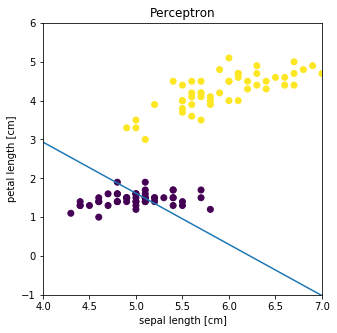

KeyboardInterrupt: 

In [6]:
import pandas as pd

df = pd.read_csv('Dane/iris.data', header=None)

# setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# sepal length and petal length
X = df.iloc[0:100, [0,2]].values

ppn = Perceptron(epochs=20, eta=0.15)
ppn.train(X, y)

# Wielowarstwowa sieć neuronowa

(*Multilayer perceptron*, *feedforward neural network*)

<img src="https://www.intechopen.com/source/html/39071/media/f2.jpg" width="700">
Źródło: https://www.intechopen.com/source/html/39071/media/f2.jpg


# Wizualizacja obszarów decyzyjnych w zalezności od liczby neuronów

<img src="http://d3kbpzbmcynnmx.cloudfront.net/wp-content/uploads/2015/09/nn-from-scratch-hidden-layer-varying-655x1024.png" width="700">
Źródło: http://d3kbpzbmcynnmx.cloudfront.net/wp-content/uploads/2015/09/nn-from-scratch-hidden-layer-varying-655x1024.png



### Fakt matematyczny: jednowarstwową siecią możemy otrzymać dowolny kształt. 

Co z tego wynika? To, że (teoretycznie) zawsze wystarczy sieć jednowarstwowa (odpowiednio duża). W praktyce rzeczywiście z reguły wystarcza jedna warstwa, ale mimo wszystko zawsze warto sprawdzić czy 2 (lub 3) nei zadziałają przypadkiem lepiej.

# 1. Sieci wielowarstwowe - klasyfikacja na zwykłym zbiorze, testowanie warstw, dropoutów

In [7]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, accuracy_score


from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

# Standaryzacji zmiennych!

In [8]:
# load data
dataset = np.loadtxt('Dane/pima-indians-diabetes.data', delimiter=",")
# split data into X and y
X = dataset[:,0:8]
Y = dataset[:,8]

print(X.shape)
print(np.mean(Y))

seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)


####
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
####


models = [LogisticRegression(),DecisionTreeClassifier(),SVC(probability=True), LinearDiscriminantAnalysis(), QuadraticDiscriminantAnalysis(), RandomForestClassifier()]

for model in models:

    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:,1]
    predictions = [round(value) for value in y_pred]

    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0), "AUC: ", roc_auc_score(y_score=y_pred,y_true=y_test))

(768, 8)
0.348958333333
Accuracy: 77.95% AUC:  0.828435319377
Accuracy: 70.87% AUC:  0.680018786903
Accuracy: 75.59% AUC:  0.834541062802
Accuracy: 77.17% AUC:  0.830716586151
Accuracy: 73.62% AUC:  0.785963499732
Accuracy: 78.35% AUC:  0.811896135266


In [9]:
from sklearn.neural_network import MLPClassifier

In [ ]:
?MLPClassifier()

Jak widzimy MLP w sklearnie zatrzymuje uczenie na podstawie tego co się dzieje w treningowym! Na to sobie można pozwolić,
gdy pracujemy nad zwykłym problemem klasyfikacji, gdzie naszymi danycmi jest tabelka, bo eksperymenty nie zajmują duzo czasu. Przy bardziej złożonych problemach, podchodzimy do tego inaczej!

In [ ]:
for h1_dim in [3,5,10,15,20,30,50,75,100,125,150,175,200,250,300,350,400,500]:

    model = MLPClassifier((h1_dim,),activation="tanh",max_iter=1000,tol=0)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:,1]
    predictions = [round(value) for value in y_pred]

    accuracy_test = accuracy_score(y_test, predictions)
    #print(h1_dim, "Accuracy Test: %.2f%%" % (accuracy_test * 100.0), )
    
    y_pred = model.predict_proba(X_train)[:,1]
    predictions = [round(value) for value in y_pred]
    accuracy_train = accuracy_score(y_train, predictions)
    print(h1_dim, "Accuracy: %.2f%%" % (accuracy_test * 100.0), "Accuracy: %.2f%%" % (accuracy_train * 100.0))

Widzimy przeuczenie w niektórych przypadkach - tam gdzie jest ok 90% na treningowym, na testowym jest najmniej.

Zauważmy, że najlepszy (na równi z innymi) wynik dało 5 neuronów! -> jeżeli różne sieci działają tak samo, to oczywiście bierzemy prostszą.

Zwróćmy uwagę, że w najlepszym przypadku uzyskaliśmy 1% więcej niż najlepszy z poprzednich klasyfikatorów. I to nie jest istotna rożnica...

In [ ]:
for h1_dim in [3,5,10,15,20,30,50,75,100,150,200,300,400,500]:

    model = MLPClassifier((h1_dim,),activation="tanh",max_iter=200)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:,1]
    predictions = [round(value) for value in y_pred]

    accuracy_test = accuracy_score(y_test, predictions)
    #print(h1_dim, "Accuracy Test: %.2f%%" % (accuracy_test * 100.0), )
    
    y_pred = model.predict_proba(X_train)[:,1]
    predictions = [round(value) for value in y_pred]
    accuracy_train = accuracy_score(y_train, predictions)
    print(h1_dim, "Accuracy: %.2f%%" % (accuracy_test * 100.0), "Accuracy: %.2f%%" % (accuracy_train * 100.0))

Widzimy, że większe sieci nie są istotnie lepsze. (na takim małym zbiorze statystycznie istotna rożnica to 3%)

In [ ]:
import itertools

In [ ]:
for h1_dim,h2_dim in itertools.product([3,5,10,15,20,30,50,75,100,150,200,300,400,500], [10,20,30,50,100]):

    model = MLPClassifier((h1_dim,h2_dim),activation="tanh",max_iter=500)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:,1]
    predictions = [round(value) for value in y_pred]

    accuracy_test = accuracy_score(y_test, predictions)
    #print(h1_dim, "Accuracy Test: %.2f%%" % (accuracy_test * 100.0), )
    
    y_pred = model.predict_proba(X_train)[:,1]
    predictions = [round(value) for value in y_pred]
    accuracy_train = accuracy_score(y_train, predictions)
    print(h1_dim, h2_dim, "Accuracy: %.2f%%" % (accuracy_test * 100.0), "Accuracy: %.2f%%" % (accuracy_train * 100.0))

Widzimy przeuczenie w części sieci.

Dodanie warstwy nie poprawiło wyników, więc nie ma sensu próbować dodawania kolejnych.

Zatem na podstawie powyższych testów, przyjęlibyśmy, że najlepsza sieć to sieć jednowarstwowa z 5 neuronami.

### Powyższe podejście do uczenia jest akceptowalne tylko w prostych problemach. Ogólnie należy uczyć inaczej: early stopping!

In [ ]:
model = MLPClassifier((5,),activation="tanh",early_stopping=True,validation_fraction=0.3)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:,1]
predictions = [round(value) for value in y_pred]

accuracy_test = accuracy_score(y_test, predictions)
print("Accuracy Test: %.2f%%" % (accuracy_test * 100.0), )
    

Na tych danych otrzymamy gorszy wynik, bo zbiór jest bardzo mały.

Uwaga: trzeba uważać na to, żeby zbiór walidacyjny był wystarczająco duży, żeby o końcu uczenia nie zadecydował przypadek.

In [ ]:
# Wczytaj dane treningowe i testowe

import pandas as pd
import numpy as np
train_set = pd.read_csv('Dane/adult.data', header = None)
test_set = pd.read_csv('Dane/adult.test',skiprows = 1, header = None) # Make sure to skip a row for the test set


col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

train = train_set.replace(' ?', np.nan).dropna()
test = test_set.replace(' ?', np.nan).dropna()



dataset = pd.concat([train,test])

dataset['wage_class'] = dataset.wage_class.replace({' <=50K.': 0,' <=50K':0, ' >50K.':1, ' >50K':1})

dataset.drop(["fnlwgt"],axis=1,inplace=True)

dataset.drop(["education"],axis=1,inplace=True)

x = dataset.groupby('native_country')["wage_class"].mean()

d = dict(pd.cut(x[x.index!=" United-States"],5,labels=range(5)))

dataset['native_country'] = dataset['native_country'].replace(d)

dataset = pd.get_dummies(dataset,drop_first=True)

train = dataset.iloc[:train.shape[0]]
test = dataset.iloc[train.shape[0]:]

X_train = train.drop("wage_class",axis=1)
y_train = train.wage_class

X_test = test.drop("wage_class",axis=1)
y_test = test.wage_class

print(X_train.shape)
X_test.shape

Sprawdźmy wyniki na surowych danych.

In [ ]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit

In [ ]:
params = {"hidden_layer_sizes": [(5),(10),(15),(30),(50),(100),(250),(500),(750),(1000),(1500),(2000),(3000),(4000)]}

nnet = MLPClassifier(activation="tanh",early_stopping=True,validation_fraction=0.15,max_iter=1000)
gs = GridSearchCV(cv=ShuffleSplit(n_splits=1,test_size=0.1),error_score="accuracy",estimator=nnet,param_grid=params)
gs.fit(X_train,y_train)

In [ ]:
gs.grid_scores_

In [ ]:
accuracy_score(gs.best_estimator_.predict(X_test),y_test)

### A teraz tak jak się powinno - na wystandaryzowanych.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
params = {"hidden_layer_sizes": [(5),(10),(15),(30),(50),(100),(250),(500),(750),(1000),(1500),(2000),(3000)]}

nnet = MLPClassifier(activation="tanh",early_stopping=True,validation_fraction=0.15,max_iter=1000)
gs = GridSearchCV(cv=ShuffleSplit(n_splits=1,test_size=0.15),error_score="accuracy",estimator=nnet,param_grid=params)
gs.fit(X_train,y_train)

In [ ]:
gs.grid_scores_

In [ ]:
accuracy_score(gs.best_estimator_.predict(X_test),y_test)

Widzimy, że najlepiej zadziałały sieci o liczbie neuronów podobnej do liczby zmiennych (42).

Uwaga: im więcej neuronów, tym więcej parametrów -> tym więcej danych potrzeba, żeby je dobrze nauczyć.

Dlatego trzeba badać sieci na dużych danych - bo jeśli badamy na małych danych to większe sieci, stoją na przegranej pozycji, pomimo tego, że gdyby danych było więcej, to być może byłyby obiektywnie lepsze.

In [ ]:
from pprint import pprint

params = {"hidden_layer_sizes": [(50,50),(100,50),(100,100),(500,100),(1000,100),(10,10)]}

nnet = MLPClassifier(activation="tanh",early_stopping=True,validation_fraction=0.15,max_iter=1000)
gs = GridSearchCV(cv=ShuffleSplit(n_splits=1,test_size=0.1),error_score="accuracy",estimator=nnet,param_grid=params)
gs.fit(X_train,y_train)
pprint(gs.grid_scores_)
accuracy_score(gs.best_estimator_.predict(X_test),y_test)

Czyli odrobinę się polepszyły wyniki.

### Ćwiczenie - pobawić się parametrami.

- funkcja aktywacji - sigmoid
- tol: rząd wielkości w górę, w dół
- sprawdzić bez early stopping
- wielkość części validacyjnej

# Uwaga

W różnych materiałach możemy sie spotkać z takim kodem. 

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25)

scores = model.evaluate(X_test, y_test)

<br>

<br>

<br>

<br>

<br>

<br>

<br>

Takie coś nie ma prawa pojawić się w poprawnym modelowaniu, bo:

1. Podglądamy wyniki na zbiorze testowym - nie daje to rzetelnej oceny jakości modelu.
2. Liczba epok jest ustalona.

# Konwolucyjne siecie neuronowe

## Convolution neural networks, CNN

### Filtrowanie - konwolucja (splot):

<img src="https://i.stack.imgur.com/SKgim.jpg" width="450">

Źródło: https://i.stack.imgur.com/SKgim.jpg

# Filtry jako ekstraktory informacji

<img src="https://adeshpande3.github.io/assets/Filter.png" width="550">

<img src="https://adeshpande3.github.io/assets/OriginalAndFilter.png" width="550">

<img src="https://adeshpande3.github.io/assets/FirstPixelMulitiplication.png" width="550">

<img src="https://adeshpande3.github.io/assets/SecondMultiplication.png" width="550">

Źródło: https://adeshpande3.github.io/assets/Filter.png

### Warstwa konwolucyjna

Warstawa konwolucyjna analizuje obraz "kawałek po kawałku" i zwraca informację o poszczególnych obszarach przy użyciu filtrów.

Warstwa konwolucyjna składa się z K filtrów i zwraca K "tablic" powstałych przez przetworzenie wejścia kolejnymi filtrami.

Operacja splotu (konwolucja):

<img src="http://deeplearning.stanford.edu/wiki/images/6/6c/Convolution_schematic.gif" width="450">

Źródło: http://deeplearning.stanford.edu/wiki/images/6/6c/Convolution_schematic.gif

### Sieć konwolucyjna uczy się ekstrachować istotne "informacje" - parametrami sieci są wagi w filtrach!

Czyli sieć sama uczy się tego, co jest istotne w danych dla naszego celu.

W sieciach konwolucyjnych na wyjście splotu nakłada się funkcję aktywacji. Z reguły jest to ReLU:

<img src="https://ml4a.github.io/images/figures/relu.png" width="350">

Źródło: https://ml4a.github.io/images/figures/relu.png

Takie przekształcenie można interpretować w następujący sposób: jeżeli w danym obszarze jest coś co dany filtr "rozpoznaje" (wartość splotu większa od 0), to zwracamy po prostu wynik splotu. Natomiast jeśli dane nie pasują do danego filtra (wartość ujemna), to niezaleznie od tego co w tych danych jest, zwracamy 0, które mówi, że nie ma tego czego szukamy.

## Pooling (subsampling)

Pooling to agregacja informacji - zamiast przechowywać całą tablicę, którą zwrócił filtr, wyciągamy sobie po jednej "informacji" z podobszarów. W ten sposób otrzymujemy tablicę o zredukowanym wymiarze.

MaxPooling:

<img src="https://adeshpande3.github.io/assets/MaxPool.png" width="550">

Jaką informację wyekstrahuje "max pooling"?

A jaką "average pooling"?

W praktyce prawie zawsze po każdej warstwie konwolujyjnej dodaje się max pooling. (Czasem nie dodaje się poolingu na końcu wielowarstwowej sieci.)

### Wielowarstwowa sieć konwolucyjna

Naturalnym rozwiązaniem są wielowarstwowe sieci konwolucyjne.

Wówczas każda kolejna warstwa w jakiś sposób agreguje informacje z poprzedniej warstwy do ogólniejszego poziomu. Przykladowa interpretacja w kontekście klasyfikacji czy na danym zdjęciu jest człowiek:
- pierwsza warstwa: rozpoznawianie kształtów/konturów
- druga warstwa: detekcja części ciała
- trzecia: detekcja człowiek


<img src="https://adeshpande3.github.io/assets/LeNet.png" width="700">
Źródło: https://adeshpande3.github.io/assets/LeNet.png"

### Wyjście sieci

Ostatnia warsta konwolucyjna (lub pooling) jest rozwijana do wektora. Ten wektor jest przepuszczany przez warstwy dense, które prowadzą do predykcji. Można dokonywać predykcji bezpośrednio z rozwiniętego wektora.

### Uwaga. Filty dla obrazka 2D jest tablicą 2D. Natomiast kolejne warstwy są 3D - dochodzi wymiar liczby filtrów. Dlatego dalsze filtry są kostami 3D, które mają głębokość równą głębokości poprzedniej warstwy.

<img src="https://www.mathworks.com/content/mathworks/www/en/discovery/convolutional-neural-network/_jcr_content/mainParsys/image_copy.img.jpg/1497876372993.jpg" width="700">

Źródło: https://www.mathworks.com/content/mathworks/www/en/discovery/convolutional-neural-network/_jcr_content/mainParsys/image_copy.img.jpg/1497876372993.jpg

## Strides - wielkość kroku przesunięcia

Określa dokładność z jaką chcemy skanować dane.

Strides = (1,1)

<img src="https://adeshpande3.github.io/assets/Stride1.png" width="600">

Strides = (2,2)

<img src="https://adeshpande3.github.io/assets/Stride2.png" width="600">

Źródło: https://adeshpande3.github.io/adeshpande3.github.io/A-Beginner's-Guide-To-Understanding-Convolutional-Neural-Networks-Part-2/


### Jeszcze jednym parametrem jest rozmiar filtra.

# Przechodzimy do praktyki!

# Obrazki 2D (szare)

http://scikit-learn.org/0.15/auto_examples/applications/face_recognition.html

In [3]:
import numpy as np
import pandas as pd
import os
from keras.utils import np_utils

Using TensorFlow backend.


In [46]:
from sklearn.datasets import fetch_lfw_people

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

n_samples, h, w = lfw_people.images.shape

X = lfw_people.data
n_features = X.shape[1]

y = lfw_people.target

target_names = lfw_people.target_names

In [47]:
X[0] # wektor - pozniej zamienimy na macierz, bo to jest obraz

array([ 254.33332825,  254.        ,  252.        , ...,   87.        ,
         88.66666412,   87.        ], dtype=float32)

In [48]:
X.shape

(1288, 1850)

In [49]:
np.unique(y,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6]), array([ 77, 236, 121, 530, 109,  71, 144]))

In [50]:
y = np_utils.to_categorical(y)
y

array([[ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

In [51]:
n_classes = y.shape[1]

In [52]:
target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'],
      dtype='<U17')

In [53]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4)

X_train = np.array([x.reshape((h, w, 1)) for x in X_train])
X_test = np.array([x.reshape((h, w, 1)) for x in X_test])

X_train = X_train / 255
X_test = X_test / 255

In [45]:
X_train[0]

array([[[ 0.32810456],
        [ 0.32418299],
        [ 0.3477124 ],
        ..., 
        [ 0.35163397],
        [ 0.21960784],
        [ 0.16470589]],

       [[ 0.31633985],
        [ 0.3385621 ],
        [ 0.40261436],
        ..., 
        [ 0.25490198],
        [ 0.26013073],
        [ 0.1738562 ]],

       [[ 0.33333334],
        [ 0.33986926],
        [ 0.41176471],
        ..., 
        [ 0.1751634 ],
        [ 0.18431373],
        [ 0.13725491]],

       ..., 
       [[ 0.59477127],
        [ 0.51764709],
        [ 0.3267974 ],
        ..., 
        [ 0.03660131],
        [ 0.10588235],
        [ 0.33202612]],

       [[ 0.58300656],
        [ 0.59869283],
        [ 0.3594771 ],
        ..., 
        [ 0.04444444],
        [ 0.05882353],
        [ 0.08888888]],

       [[ 0.57254905],
        [ 0.63137257],
        [ 0.45620915],
        ..., 
        [ 0.04836601],
        [ 0.05228758],
        [ 0.0496732 ]]], dtype=float32)

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

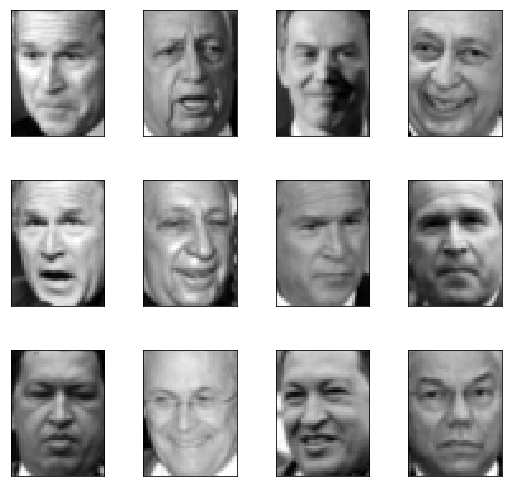

In [55]:
images = X_train[:12]
n_col = 4
n_row = 3
plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
for i in range(n_row * n_col):
    plt.subplot(n_row, n_col, i + 1)
    plt.imshow(images[i][:,:,0], cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())
    
plt.show()

In [56]:
X_train.shape

(772, 50, 37, 1)

In [57]:
y_train.shape

(772, 7)

In [58]:
X_test.shape

(516, 50, 37, 1)

### Ćwiczenie 1. Punkt odniesienia

Sprawdź klasyfikację przy użyciu perceptrona - sieć 0-warstwowa (lub 1-warstwowa licząc wyjście jako warstwę). Pamiętaj, że, aby uruchomić warstwę dense na danych, które nie są wektorem trzeba je "rozwinąć" przy uzyciu "warstwy" (operacji) Flatten. 

In [59]:
from keras.models import Sequential

from keras.layers import Dense, Flatten, Dropout
from keras.constraints import maxnorm
# keras.optimizers import SGD
from keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D

from keras.callbacks import EarlyStopping, ModelCheckpoint

In [62]:
model = Sequential()
model.add(Flatten(input_shape=(50,37,1)))
model.add(Dense(n_classes,activation="softmax"))

model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["categorical_accuracy"])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 1850)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 12957     
Total params: 12,957
Trainable params: 12,957
Non-trainable params: 0
_________________________________________________________________
None


In [63]:
early_stopping = EarlyStopping(patience=3, monitor="val_loss")

model.fit(X_train,y_train,validation_split=0.25,epochs=100,callbacks=[early_stopping])

model.evaluate(X_test,y_test)

Train on 579 samples, validate on 193 samples
Epoch 1/100
579/579 [==============================] - 0s - loss: 1.7694 - categorical_accuracy: 0.3851 - val_loss: 1.7537 - val_categorical_accuracy: 0.4352
Epoch 2/100
579/579 [==============================] - 0s - loss: 1.6893 - categorical_accuracy: 0.4301 - val_loss: 1.8499 - val_categorical_accuracy: 0.4819
Epoch 3/100
579/579 [==============================] - 0s - loss: 1.6220 - categorical_accuracy: 0.4370 - val_loss: 1.6641 - val_categorical_accuracy: 0.4249
Epoch 4/100
579/579 [==============================] - 0s - loss: 1.5795 - categorical_accuracy: 0.4093 - val_loss: 1.5779 - val_categorical_accuracy: 0.4767
Epoch 5/100
579/579 [==============================] - 0s - loss: 1.4895 - categorical_accuracy: 0.4611 - val_loss: 1.5532 - val_categorical_accuracy: 0.5078
Epoch 6/100
579/579 [==============================] - 0s - loss: 1.4331 - categorical_accuracy: 0.4940 - val_loss: 1.4437 - val_categorical_accuracy: 0.5440
Epoch 

[1.1090443198995072, 0.63178294573643412]

Z wyciągnięciem modelu z najlepszej epoki:

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(50,37,1)))
model.add(Dense(n_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['categorical_accuracy'])
print(model.summary())

early_stopping = EarlyStopping(patience=3,monitor="val_loss")
take_best_model = ModelCheckpoint("wagi.h5py", save_best_only=True)

model.fit(X_train, y_train, validation_split=0.25, epochs=100, callbacks=[early_stopping,take_best_model], batch_size=32,)

model.load_weights("wagi.h5py")
scores = model.evaluate(X_test, y_test, verbose=0)
os.remove("wagi.h5py")

print("Accuracy test: %.2f%%" % (scores[1]*100))

### Ćwiczenie 2.

Sprawdź klasyfikację przy użyciu sieci jednowarstwowej, dla rozmiarów stanu ukrytego: 20,50,100,150,200,300.

In [ ]:
Accuracies = []

for h_dim in [20,50,100,150,200,300]:

    model = Sequential()
    model.add(Flatten(input_shape=(50,37,1)))
    model.add(Dense(h_dim))
    model.add(Dense(n_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['categorical_accuracy'])
    print(model.summary())
    
    early_stopping = EarlyStopping(patience=3,monitor="val_loss")
    take_best_model = ModelCheckpoint("wagi.h5py", save_best_only=True)
    
    model.fit(X_train, y_train, verbose=0,validation_split=0.25, epochs=100, callbacks=[early_stopping,take_best_model], batch_size=32,)

    model.load_weights("wagi.h5py")
    os.remove("wagi.h5py")
    scores = model.evaluate(X_test, y_test, verbose=0)
    Accuracies.append(scores[1]*100)
    
print(Accuracies)

### Ćwiczenie 3

Weź najlepszą sieć z poprzedniego kroku i dodaj kolejną warstwę dense - rozpatrz takie same wielkosci stanu ukrytego jak poprzednio.

In [ ]:
Accuracies = []

for h_dim in [20,50,100,150,200,300]:

    model = Sequential()
    model.add(Flatten(input_shape=(50,37,1)))
    model.add(Dense(150, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dense(h_dim, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dense(n_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['categorical_accuracy'])
    print(model.summary())
    
    early_stopping = EarlyStopping(patience=3,monitor="val_loss")
    take_best_model = ModelCheckpoint("wagi.h5py", save_best_only=True)
    
    model.fit(X_train, y_train, verbose=0,validation_split=0.25, epochs=100, callbacks=[early_stopping,take_best_model], batch_size=32,)

    model.load_weights("wagi.h5py")
    os.remove("wagi.h5py")
    scores = model.evaluate(X_test, y_test, verbose=0)
    Accuracies.append(scores[1]*100)
    
Print(Accuracies)

### Ćwiczenie 4. Prosta sieć konwolucyjna.

Liczba filtrów: 10, wielkość filtra: 5,5.

In [ ]:
?Conv2D

In [ ]:
model = Sequential()
model.add(Conv2D(10, (5, 5), input_shape=(50,37,1), padding='valid', activation='relu'))
model.add(Flatten())
model.add(Dense(n_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['categorical_accuracy'])
print(model.summary())

early_stopping = EarlyStopping(patience=3,monitor="val_loss")
take_best_model = ModelCheckpoint("wagi.h5py", save_best_only=True)

model.fit(X_train, y_train, validation_split=0.25, epochs=100, callbacks=[early_stopping,take_best_model], batch_size=32,)

model.load_weights("wagi.h5py")
os.remove("wagi.h5py")
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy test: %.2f%%" % (scores[1]*100))

Omówić strukturę - wyjaśnić co robi padding równy "valid".

### Ćwiczenie 5. Zmień padding na "same".

Wyjaśnić co robi.

In [ ]:
model = Sequential()
model.add(Conv2D(10, (5, 5), input_shape=(50,37,1), padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(n_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['categorical_accuracy'])
print(model.summary())

early_stopping = EarlyStopping(patience=3,monitor="val_loss")
take_best_model = ModelCheckpoint("wagi.h5py", save_best_only=True)

model.fit(X_train, y_train, validation_split=0.25, epochs=100, callbacks=[early_stopping,take_best_model], batch_size=32,)

model.load_weights("wagi.h5py")
os.remove("wagi.h5py")
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy test: %.2f%%" % (scores[1]*100))

Accuracy wzrosło o 3%! Widocznie wcześniej traciliśmy istotne informacje z brzegów obrazka.

### Ćwiczenie 6. Badanie parametrów:

Liczby filtrów: 3, 5, 10, 15, 30

Wielkości filtrów: (3,3),(5,5),(10,10)

In [64]:
N_filters = [10,15,30]
C = [3,5,10]

from itertools import product

for n_filters, c in product(N_filters, C):

    
    
    
    model = Sequential()
    model.add(Conv2D(n_filters, (c, c), input_shape=(50,37,1), padding='same', activation='relu'))
    model.add(Flatten())
    model.add(Dense(n_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['categorical_accuracy'])
    
    # TUTAJ TRZEBA TO DOADAC BO INACZEJ JEST JAKIS BLAD TECHNICZNY:
    early_stopping = EarlyStopping(patience=3,monitor="val_loss")
    take_best_model = ModelCheckpoint("wagi.h5py", save_best_only=True)
    
    model.fit(X_train, y_train, verbose=0,validation_split=0.25, epochs=100, 
              callbacks=[early_stopping,take_best_model], batch_size=32)
    
    model.load_weights("wagi.h5py")
    
    scores = model.evaluate(X_test, y_test, verbose=0)
    os.remove("wagi.h5py")
    print(n_filters, c, " Accuracy test: %.2f%%" % (scores[1]*100))

10 3  Accuracy test: 78.10%
10 5  Accuracy test: 78.68%
10 10  Accuracy test: 78.29%
15 3  Accuracy test: 77.13%
15 5  Accuracy test: 82.56%
15 10  Accuracy test: 80.23%
30 3  Accuracy test: 77.13%
30 5  Accuracy test: 83.91%
30 10  Accuracy test: 81.78%


Czyli wyszło, że najlepszy jest rozmiar filtra 10x10 i 10 lub 15w.

Uwaga: to jest już sytuacja, która nie obrazuje prawdziwej jakości modelu - bo analizujemy jakość działania sieci z różnymi parametrami na zbiorze testowym. Żeby formalnie ocenić jakość działania najlepszej z tych ieci powinniśmy ją przetestować na nowym zbiorze.

### Ćwiczenie 7. MaxPooling, AveragePooling

Przetestuj dodanie warstwy pooling po warstwie konwolucyjnej, dla konwolucji z najlepszymi parametrami.

In [65]:
for pooling in [MaxPooling2D(pool_size=(2, 2)),
               MaxPooling2D(pool_size=(4, 4)),
               MaxPooling2D(pool_size=(6, 6)),
               AveragePooling2D(pool_size=(2,2)),
               AveragePooling2D(pool_size=(4,4))]:

    model = Sequential()
    model.add(Conv2D(15, (10, 10), input_shape=(50,37,1), padding='same', activation='relu'))
    model.add(pooling)
    model.add(Flatten())
    model.add(Dense(n_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['categorical_accuracy'])
    print(model.summary())
  
    early_stopping = EarlyStopping(patience=3,monitor="val_loss")
    take_best_model = ModelCheckpoint("wagi.h5py", save_best_only=True)

    model.fit(X_train, y_train, verbose=0,validation_split=0.25, epochs=100, callbacks=[early_stopping,take_best_model], batch_size=32,)

    model.load_weights("wagi.h5py")
    os.remove("wagi.h5py")
    scores = model.evaluate(X_test, y_test, verbose=0)
    print("Accuracy test: %.2f%%" % (scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 50, 37, 15)        1515      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 18, 15)        0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 6750)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 7)                 47257     
Total params: 48,772
Trainable params: 48,772
Non-trainable params: 0
_________________________________________________________________
None
Accuracy test: 84.30%
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 50, 37, 15)        1515      
_____________________________________________

Spójrzmy na strukture powyższego - pooling (w takiej wersji) zmniejsza wymiar.

### Ćwiczenie 8. [Ten krok trwa kilkanaście minut!]

Testujemy liczbę, filtrów, ich rozmiary i rozmiar okna pooling jednoczesnie.

In [ ]:
N_filters = [15,30,40]
C = [3,5,7,10]
P = [2,4,6]


for n_filters, c, p in product(N_filters, C, P):

    model = Sequential()
    
    model.add(Conv2D(n_filters, (c, c), input_shape=(50,37,1), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(p,p)))
    
    model.add(Flatten())
    model.add(Dense(n_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['categorical_accuracy'])
    #print(model.summary())
  
    early_stopping = EarlyStopping(patience=3,monitor="val_loss")
    take_best_model = ModelCheckpoint("wagi.h5py", save_best_only=True)

    model.fit(X_train, y_train, verbose=0,validation_split=0.25, epochs=100, callbacks=[early_stopping,take_best_model], batch_size=32,)

    model.load_weights("wagi.h5py")
    os.remove("wagi.h5py")
    scores = model.evaluate(X_test, y_test, verbose=0)
    print(n_filters, c, p, "Accuracy test: %.2f%%" % (scores[1]*100))

### Ćwiczenie 9.

Weź najlepszą sieć z poprzedniego kroku. Przetestuj dodanie warstwy dense, między poolingiem, a outputem.

Rozważ wymiary stanu ukrytego: 10, 30, 50.

In [ ]:
for h_dim in [10, 30, 50]:

    model = Sequential()
    model.add(Conv2D(15, (10, 10), input_shape=(50,37,1), padding='same', activation='relu'))
    model.add(Dropout(0.2))
    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    
    model.add(Flatten())
    model.add(Dense(h_dim))
    model.add(Dropout(0.2))
    
    model.add(Dense(n_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['categorical_accuracy'])
    print(model.summary())

    early_stopping = EarlyStopping(patience=3,monitor="val_loss")
    take_best_model = ModelCheckpoint("wagi.h5py", save_best_only=True)

    model.fit(X_train, y_train, verbose=0,validation_split=0.25, epochs=100, callbacks=[early_stopping,take_best_model], batch_size=32,)

    model.load_weights("wagi.h5py")
    os.remove("wagi.h5py")
    scores = model.evaluate(X_test, y_test, verbose=0)
    print("Accuracy test: %.2f%%" % (scores[1]*100))

Czyli jest gorzej.

### Ćwiczenie 10. Dwie warstwy konwolucyjne.

Zamiast warstwy dense dodanej w poprzednim kroku, wstaw warstwę konwolucyjną. Rozważ 5, 10, i 15 filtrów wymiarów 3x3, 5x5, 10x10.

In [ ]:
for n_filters, c in product([10,20,30], [3,5,10]):

    model = Sequential()
    model.add(Conv2D(15, (10, 10), input_shape=(50,37,1), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(n_filters, (c, c), padding='same', activation='relu'))
    
    model.add(Flatten())
    model.add(Dense(n_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['categorical_accuracy'])
    print(model.summary())

    early_stopping = EarlyStopping(patience=3,monitor="val_loss")
    take_best_model = ModelCheckpoint("wagi.h5py", save_best_only=True)

    model.fit(X_train, y_train, verbose=0,validation_split=0.25, epochs=100, callbacks=[early_stopping,take_best_model], batch_size=32,)

    model.load_weights("wagi.h5py")
    os.remove("wagi.h5py")
    scores = model.evaluate(X_test, y_test, verbose=0)
    print(n_filters, c, "Accuracy test: %.2f%%" % (scores[1]*100))

Czyli widzimy, że się pogorszyło. Ale nie zrobilismy max poolingu po tej warstwie, który z reguły pomaga!

### Ćwiczenie 11. 

Przetestuj dodanie do porzedniej sieci max pooling'u po drugiej warstwie konwolucyjnej, z poolsize równym (2,2) i strides równymi (1,1), (2,2). Czy strides równe (3,3), gdy poolsize = (2,2) ma sens?.

In [ ]:
for s in [1,2]:

    model = Sequential()
    model.add(Conv2D(15, (10, 10), input_shape=(50,37,1), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(4, 4)))
    model.add(Conv2D(20, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2),strides=(s,s)))
    
    model.add(Flatten())
    model.add(Dense(n_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['categorical_accuracy'])
    print(model.summary())

    early_stopping = EarlyStopping(patience=3,monitor="val_loss")
    take_best_model = ModelCheckpoint("wagi.h5py", save_best_only=True)

    model.fit(X_train, y_train, verbose=0,validation_split=0.25, epochs=100, callbacks=[early_stopping,take_best_model], batch_size=32)

    model.load_weights("wagi.h5py")
    os.remove("wagi.h5py")
    scores = model.evaluate(X_test, y_test, verbose=0)
    print("Accuracy test: %.2f%%" % (scores[1]*100))

Czyli na tym możemy zakończyć konstrukcję najlpeszej sieci. W punkie 7 dostaliśmy najlepszą sieć (85%) i kolejne warstwy (dense, conv) nie dodały jakości.

### Ćwiczenie 13.

Przetestuj ograniczenie normy filtra maxnorm(k) dla k równego

In [ ]:
for k in [1,2,3,5,7,10,15,20,30]:

    model = Sequential()
    model.add(Conv2D(15, (10, 10), input_shape=(50,37,1), padding='same', activation='relu', kernel_constraint=maxnorm(k)))
    model.add(MaxPooling2D(pool_size=(4, 4)))
    model.add(Flatten())
    model.add(Dense(n_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['categorical_accuracy'])
    #print(model.summary())

    early_stopping = EarlyStopping(patience=3,monitor="val_loss")
    take_best_model = ModelCheckpoint("wagi.h5py", save_best_only=True)

    model.fit(X_train, y_train, verbose=0,validation_split=0.25, epochs=100, callbacks=[early_stopping,take_best_model], batch_size=batch_size)

    model.load_weights("wagi.h5py")
    os.remove("wagi.h5py")
    scores = model.evaluate(X_test, y_test, verbose=0)
    print("Accuracy test: %.2f%%" % (scores[1]*100))

I na tym możemy zakończyć budowe sieci.

### Ćwiczenie 12.

Dla najlepszej sieci przetestuj wielkości batcha: 1,5,10,15,20,30.

In [ ]:
for batch_size in [1,5,10,15,20,30]:

    model = Sequential()
    model.add(Conv2D(15, (10, 10), input_shape=(50,37,1), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(n_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['categorical_accuracy'])
    #print(model.summary())

    early_stopping = EarlyStopping(patience=3,monitor="val_loss")
    take_best_model = ModelCheckpoint("wagi.h5py", save_best_only=True)

    model.fit(X_train, y_train, verbose=0,validation_split=0.25, epochs=100, callbacks=[early_stopping,take_best_model], batch_size=batch_size)

    model.load_weights("wagi.h5py")
    os.remove("wagi.h5py")
    scores = model.evaluate(X_test, y_test, verbose=0)
    print("Accuracy test: %.2f%%" % (scores[1]*100))

# Obrazki 3d (kolorowe - RGB)

In [66]:
from keras.datasets import cifar10
from scipy.misc import toimage

import numpy as np

# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

nb_classes = 4
n_samples = 7000

X_train, y_train = X_train[np.where(y_train<nb_classes)[0]][:n_samples], y_train[np.where(y_train<nb_classes)[0]][:n_samples]
X_test, y_test = X_test[np.where(y_test<nb_classes)[0]], y_test[np.where(y_test<nb_classes)[0]]

print(X_train.shape)
print(X_test.shape)
print(np.unique(y_train,return_counts=True))
print(X_train[0])

# create a grid of 3x3 images
for i in range(0, 9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(toimage(X_train[i]))
# show the plot
pyplot.show()

(7000, 32, 32, 3)
(4000, 32, 32, 3)
(array([0, 1, 2, 3], dtype=uint8), array([1738, 1733, 1779, 1750]))
[[[170 180 198]
  [168 178 196]
  [177 185 203]
  ..., 
  [162 179 215]
  [158 178 214]
  [157 177 212]]

 [[168 181 198]
  [172 185 201]
  [171 183 200]
  ..., 
  [159 177 212]
  [156 176 211]
  [154 174 209]]

 [[154 170 186]
  [149 165 181]
  [129 144 162]
  ..., 
  [161 178 214]
  [157 177 212]
  [154 174 209]]

 ..., 
 [[ 74  84  80]
  [ 76  85  81]
  [ 78  85  82]
  ..., 
  [ 71  75  78]
  [ 68  72  75]
  [ 61  65  68]]

 [[ 68  76  77]
  [ 69  77  78]
  [ 72  79  78]
  ..., 
  [ 76  80  83]
  [ 71  75  78]
  [ 71  75  78]]

 [[ 67  75  78]
  [ 68  76  79]
  [ 69  75  76]
  ..., 
  [ 75  79  82]
  [ 71  75  78]
  [ 73  77  80]]]


NameError: name 'pyplot' is not defined

In [67]:
# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

y_train[0:5]

X_train[0].shape

(32, 32, 3)

### Zadanie 1. Zbuduj jednowarstwową siec konwolucyjną z maxpoolingiem.

Liczba filtrów: 32; rozmiar filtra: 5x5.

In [ ]:
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(32, 32,3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['categorical_accuracy'])
print(model.summary())

In [ ]:
early_stopping = EarlyStopping(patience=3,monitor="val_loss")
take_best_model = ModelCheckpoint("wagi.h5py", save_best_only=True)

model.fit(X_train, y_train, validation_split=0.14, epochs=100, callbacks=[early_stopping,take_best_model], batch_size=32)

model.load_weights("wagi.h5py")
os.remove("wagi.h5py")
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy test: %.2f%%" % (scores[1]*100))

### Zadanie 2. Dodaj warstwę dense między poolingiem a wyjściem.

Rozpatrz rozmiary tej warstwy: 100, 250, 500

In [ ]:
model = Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(32, 32,3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['categorical_accuracy'])
print(model.summary())

In [ ]:
early_stopping = EarlyStopping(patience=3,monitor="val_loss")
take_best_model = ModelCheckpoint("wagi.h5py", save_best_only=True)

model.fit(X_train, y_train, validation_split=0.14, epochs=100, callbacks=[early_stopping,take_best_model], batch_size=32)

model.load_weights("wagi.h5py")
os.remove("wagi.h5py")
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy test: %.2f%%" % (scores[1]*100))

### Zadanie 3. Zdadaj dwuwarstwową się conwolucyjną

Max pooling tylko po pierwszej konwolucji

### Zadanie 4. Zdadaj dwuwarstwową się conwolucyjną

Max pooling po obu warstwach konwolucyjnych.

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(3, 32, 32), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
epochs = 25
#lrate = 0.01
#decay = lrate/epochs
#sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
print(model.summary())

early_stopping = EarlyStopping(patience=3,monitor="val_loss")
take_best_model = ModelCheckpoint("wagi.h5py", save_best_only=True)

model.fit(X_train, y_train, validation_split=0.14, epochs=100, callbacks=[early_stopping,take_best_model], batch_size=32)

model.load_weights("wagi.h5py")
os.remove("wagi.h5py")
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy test: %.2f%%" % (scores[1]*100))

### Zadanie 5. Do poprzedniej sieci wstaw regularyzację dropout na obu warstwach konwolucyjnych.

Rozważ poziomy 0.2 i 0.5.

### Zadanie 6. Zbudować i przetestować sieć przestawioną na rysunku:

<img src="https://adeshpande3.github.io/assets/LeNet.png" width="700">
Źródło: https://adeshpande3.github.io/assets/LeNet.png"


In [68]:
model = Sequential()
model.add(Conv2D(6, (5, 5), input_shape=(32, 32, 3), padding='valid', activation='relu', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.2))
model.add(Conv2D(16, (5, 5), activation='relu', padding='valid', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='tanh', kernel_constraint=maxnorm(3)))
model.add(Dense(84, activation='tanh', kernel_constraint=maxnorm(3)))
#model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
epochs = 25
#lrate = 0.01
#decay = lrate/epochs
#sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
print(model.summary())

early_stopping = EarlyStopping(patience=3,monitor="val_loss")
take_best_model = ModelCheckpoint("wagi.h5py", save_best_only=True)

model.fit(X_train, y_train, validation_split=0.14, epochs=100, callbacks=[early_stopping,take_best_model], batch_size=32)

model.load_weights("wagi.h5py")
os.remove("wagi.h5py")
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy test: %.2f%%" % (scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 10, 10, 16)        12816     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 400)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 120)               48120     
_________________________________________________________________
dense_19 (Dense)             (None, 84)                10164     
__________